In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import yfinance as yf
from scipy.stats import norm
from scipy.stats import cauchy 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Percent change: 21.3026960140612%
Average profit: $745.5743456451256
Average value: $3499.9060454742266


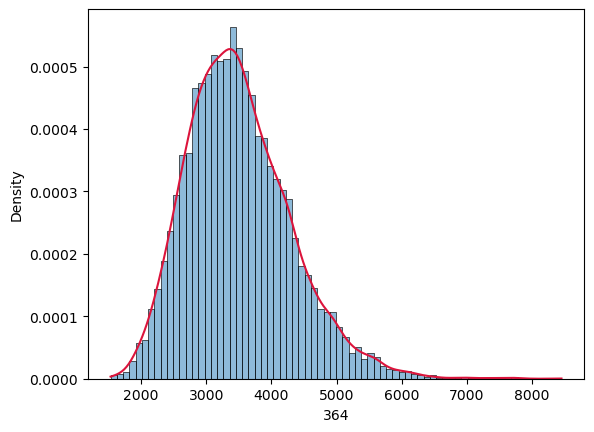

In [3]:
def getData(stocks, num_shares, start = "2010-01-01"):
    data = pd.DataFrame()
    for i in range(0, len(stocks)):
        data[i] = yf.download(stocks[i], start)['Adj Close'] * num_shares[i]
    
    result = np.sum(data, axis = 1)
    return result


def computeReturns(data, iterations, days):
    log_return = np.log(1 + data.pct_change())
    mu = log_return.mean()
    var = log_return.var()
    drift = (mu - (0.5 * var))

    std_dev = log_return.std()

  
    result = np.exp(drift + std_dev * norm.rvs(size = (days, iterations)))
    
    prices = np.zeros_like(result)
    prices[0] = data.iloc[-1]
    for i in range(1, days):
        prices[i] = prices[i - 1] * result[i]

    x = pd.DataFrame(prices).iloc[-1]
    
    #graph = sns.histplot(x, stat="density", kde=True)
    #graph.lines[0].set_color('crimson')
    
    #for i in range(prices.shape[1]):  
        #plt.plot(prices[:, i], lw=1)

    avg_price = prices[-1].sum()/iterations
    percent_change = (avg_price - prices[0][0])/avg_price * 100
    avg_profit = (prices[-1] - prices[0]).sum()/iterations
    
    print(f'Percent change: {percent_change}%')
    print(f'Average profit: ${avg_profit}')
    print(f'Average value: ${avg_price}')

    return x

#computeReturns(getData(["GOOGL", "RTX", "VOO", "TSM", "BRK-B"], [51.37, 91, 13.05, 9.17, 15]), 10000, 365)
computeReturns(getData(["VOO", "NVDA", "SCHD"], [3.51, 5.13, 5.86]), 10000, 365)